### Before you start, make sure you have the following packages:

### Packages used in this notebook:
1. astropy -- unit conversions, fits data access, image processing
2. matplotlib -- data visualization

### Packages not used in this notebook, but are great to have:
1. numpy -- data analysis
2. scipy -- data analysis
3. pandas -- data storage, management
4. skimage -- image processing, data visualization
5. ...

# 1. Import Packages

In [58]:
#import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt

# 2. Open `.fits` File

In [59]:
# open fits file
fileName = 'ngc4548_w4_mjysr'
hdu_galaxy = fits.open('/home/jackson/galaxies/ngc4548/' + fileName + '.fits')[0]

# set up coordinate grid for data in fits file
wcs_im = WCS(hdu_galaxy.header)


# 3. Access `.fits` Header

In [60]:
# here's what the header looks like
# this is the best place to confirm what the units are how your data was processed
hdu_galaxy.header

SIMPLE  =                    T / Written by IDL:  Sat Jun 18 10:05:32 2022      
BITPIX  =                  -64 /  IEEE double precision floating point          
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  655 / length of data axis 1                          
NAXIS2  =                  655 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'RA---TAN'           / TANgent plane                                  
CTYPE2  = 'DEC--TAN'           / TANgent plane                                  
CRVAL1  =            188.86024 / Reference RA                                   
CRVAL2  =            14.496331 / Reference Dec                                  
CRPIX1  =                 32

# 4. Display `.fits` Image

Use `matplotlib.pyplot.imshow` to display data. 

`imshow` documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

I include some code below to quickly format the figure to my personal tastes. Feel free to play around with this code, check out the documentation pages, and add your own variations :)

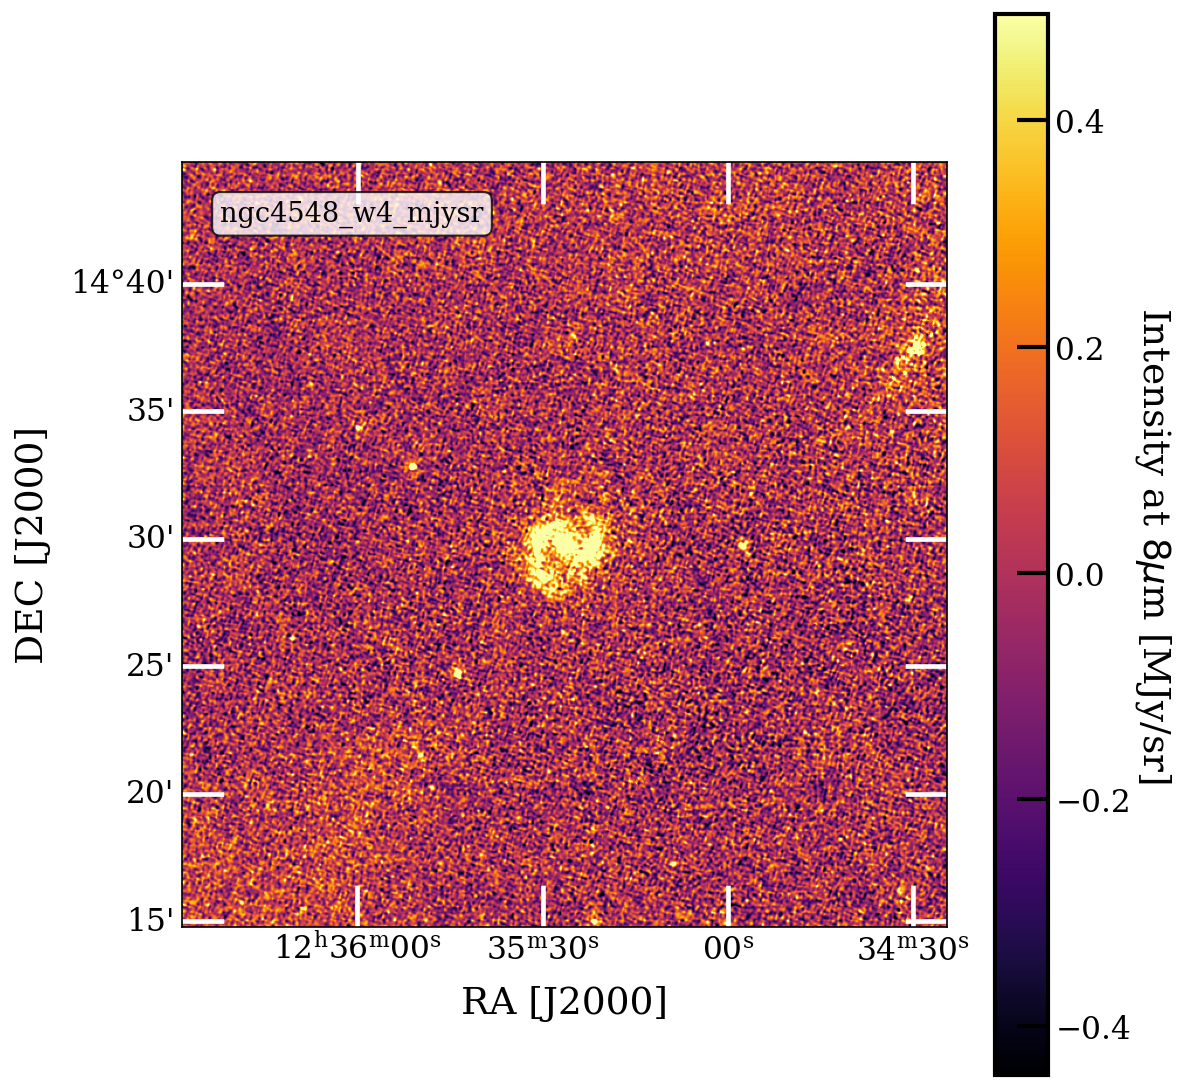

In [61]:
# start a figure
f = plt.figure(figsize=(8, 8))
# set up a subplot with coordinate information from fits file header
ax = plt.subplot(projection=wcs_im)
vmin = -0.44361181809464595
vmax = 0.4938239851487023
# display fits image
im = ax.imshow(hdu_galaxy.data, origin='lower', norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), aspect='equal', cmap='inferno', alpha=1)

# everything that comes after this point is to make the figure look prettier; 
# strictly speaking, these aren't necessary
plt.rcParams["font.family"] = "serif"
mpl.rcParams['text.usetex'] = False

f.set_dpi(150)
f.set_facecolor('w')
ax.set_facecolor('k')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, fileName, transform=ax.transAxes, fontsize=13,
                verticalalignment='top', bbox=props, zorder=11)
ax.set_xlabel('RA [J2000]', fontsize=18)
ax.set_ylabel('DEC [J2000]', fontsize=18)
ax.tick_params(axis='both', which='major', direction='in', color='white', length=20, width=2, labelsize=15)

# set up colorbar
cmap = mpl.cm.inferno
normalize = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = f.colorbar(im, ax=ax)
cbar.set_label('Intensity at $8 \mu$m [MJy/sr]', rotation=270, fontsize=18, labelpad=20)
cbar.ax.tick_params(direction='in', which='both', labelsize=15)
cbar.ax.tick_params(which='major', length=15, width=2)
cbar.ax.tick_params(which='minor', length=5, width=1)
plt.setp(cbar.ax.spines.values(), linewidth=2)

f.tight_layout()

#plt.savefig('/home/jackson/export/' + fileName)
